In [1]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
quandl.ApiConfig.api_key = 's'

In [7]:
HDFCBANK=quandl.get('NSE/HDFCBANK.5', start_date='2017-11-30', end_date='2018-11-30')
HDFC    =quandl.get('NSE/HDFC.5', start_date='2017-11-30', end_date='2018-11-30')
HINDALCO=quandl.get('NSE/HINDALCO.5', start_date='2017-11-30', end_date='2018-11-30')
ACC=quandl.get('NSE/ACC.5', start_date='2017-11-30', end_date='2018-11-30')

In [9]:
ACC.iloc[0]['Close']

1667.9

In [18]:
ACC['NR']=ACC['Close']/ACC.iloc[0]['Close']# wihout for loop

In [19]:
ACC.head()

,Close,NR
Date,,
2017-11-30,1667.90,1.000000
2017-12-01,1676.65,1.005246
2017-12-04,1694.05,1.015678
2017-12-05,1698.20,1.018167
2017-12-06,1690.10,1.013310


In [21]:
#since i have to perform this for all stocks, whynot use for loop?
#first let's drop NR from ACC
ACC.drop(['NR'],inplace=True,axis=1)

In [22]:
for df_nr in(HDFCBANK,HDFC,HINDALCO,ACC):
    df_nr['Normalized Returns']=df_nr['Close']/df_nr.iloc[0]['Close']

In [23]:
ACC.head()

,Close,Normalized Returns
Date,,
2017-11-30,1667.90,1.000000
2017-12-01,1676.65,1.005246
2017-12-04,1694.05,1.015678
2017-12-05,1698.20,1.018167
2017-12-06,1690.10,1.013310


In [24]:
HDFCBANK.tail()

,Close,Normalized Returns
Date,,
2018-11-26,2049.80,1.105788
2018-11-27,2064.00,1.113449
2018-11-28,2089.25,1.127070
2018-11-29,2131.05,1.149620
2018-11-30,2128.45,1.148217


In [25]:
for df_nr,allo in zip([HDFCBANK,HDFC,HINDALCO,ACC],(.4,.3,.2,.1)):
    df_nr['Allocation']=df_nr['Normalized Returns']*allo

In [34]:
ACC.tail()

,Close,Normalized Returns,Allocation
Date,,,
2018-11-26,1439.10,0.862822,0.086282
2018-11-27,1445.15,0.866449,0.086645
2018-11-28,1436.95,0.861532,0.086153
2018-11-29,1463.80,0.877631,0.087763
2018-11-30,1485.50,0.890641,0.089064


In [27]:
ACC.tail()

,Close,Normalized Returns,Allocation
Date,,,
2018-11-26,1439.10,0.862822,0.086282
2018-11-27,1445.15,0.866449,0.086645
2018-11-28,1436.95,0.861532,0.086153
2018-11-29,1463.80,0.877631,0.087763
2018-11-30,1485.50,0.890641,0.089064


In [42]:
Aloc=pd.concat([HDFCBANK['Allocation'],HDFC['Allocation'],HINDALCO['Allocation'],ACC['Allocation']],axis=1)

In [45]:
Aloc.columns=['HDFCBANK','HDFC','HINDALCO','ACC']


In [46]:
Aloc['sum']=Aloc.ACC+Aloc.HDFC+Aloc.HDFCBANK+Aloc.HINDALCO

In [47]:
Aloc.tail()

,HDFCBANK,HDFC,HINDALCO,ACC,sum
Date,,,,,
2018-11-26,0.442315,0.337408,0.181992,0.086282,1.047998
2018-11-27,0.445380,0.340461,0.182907,0.086645,1.055392
2018-11-28,0.450828,0.345169,0.179705,0.086153,1.061855
2018-11-29,0.459848,0.350236,0.186733,0.087763,1.084580
2018-11-30,0.459287,0.356090,0.188147,0.089064,1.092588


In [49]:
for df_pos in (HDFCBANK,HDFC,HINDALCO,ACC):
    df_pos['Position']=df_pos['Allocation']*100000

In [51]:
ACC.tail()

,Close,Normalized Returns,Allocation,Position
Date,,,,
2018-11-26,1439.10,0.862822,0.086282,8628.215121
2018-11-27,1445.15,0.866449,0.086645,8664.488279
2018-11-28,1436.95,0.861532,0.086153,8615.324660
2018-11-29,1463.80,0.877631,0.087763,8776.305534
2018-11-30,1485.50,0.890641,0.089064,8906.409257


In [52]:
Portfolio=pd.concat([HDFCBANK['Position'],HDFC['Position'],HINDALCO['Position'],ACC['Position']],axis=1)

In [53]:
Portfolio.columns=['HDFCBANK','HDFC','HINDALCO','ACC']

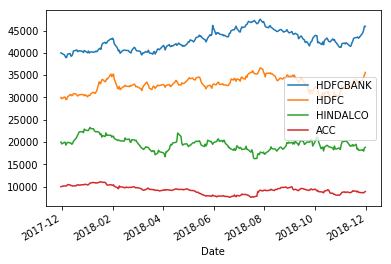

In [54]:
Portfolio.plot()

In [55]:
Portfolio['Total']=Portfolio.sum(axis=1)

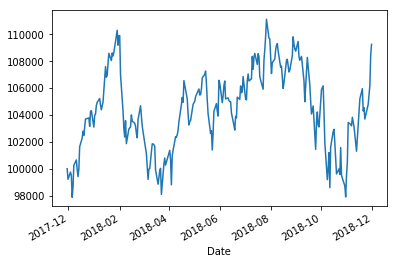

In [56]:
Portfolio['Total'].plot()

In [57]:
Portfolio['Return']=Portfolio['Total'].pct_change(1)

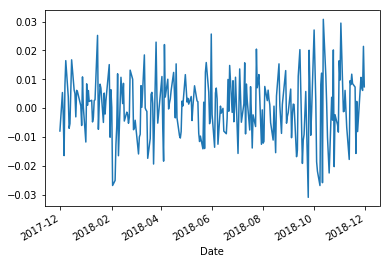

In [58]:
Portfolio['Return'].plot()

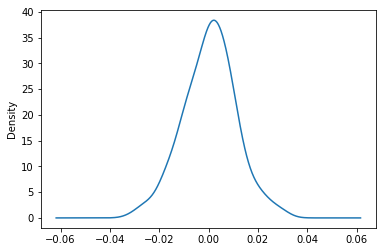

In [60]:
Portfolio['Return'].plot(kind='kde')

In [61]:
cum_ret=100*(Portfolio['Total'][-1]/Portfolio['Total'][0]-1)

In [62]:
cum_ret

9.258814051055086

In [63]:
Portfolio['Return'].std()

0.010799780976567936

In [64]:
Portfolio['Return'].mean()

0.0004181146890763404

In [65]:
sharpe=Portfolio['Return'].mean()/Portfolio['Return'].std()

In [66]:
sharpe

0.038715108202982566

In [67]:
annual_Sharpe=(252**.05)*sharpe

In [68]:
annual_Sharpe

0.05104468221772802

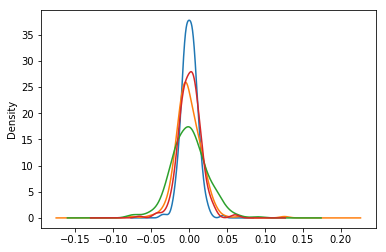

In [71]:
HDFCBANK['Close'].pct_change(1).plot(kind='kde')
ACC['Close'].pct_change(1).plot(kind='kde')
HINDALCO['Close'].pct_change(1).plot(kind='kde')
HDFC['Close'].pct_change(1).plot(kind='kde')